# World Data League 2021
## Notebook Template

This notebook is one of the mandatory deliverables when you submit your solution (alongside the video pitch). Its structure follows the WDL evaluation criteria and it has dedicated cells where you can add descriptions. Make sure your code is readable as it will be the only technical support the jury will have to evaluate your work.

The notebook must:

*   💻 have all the code that you want the jury to evaluate
*   🧱 follow the predefined structure
*   📄 have markdown descriptions where you find necessary
*   👀 be saved with all the output that you want the jury to see
*   🏃‍♂️ be runnable

**Introduction** 

Describe how you framed the challenge by telling us what problem are you trying to solve and how your solution solves that problem.

**<ins>Research:<ins>**
    
    Safety, barrier freedom and affordability are the three most recognized and promoted age-friendly transport system qualities. 

    Public transport and walking are the most recurring modes of transport among older people, who are less likely to have cars, in cities in Europe. Unsuitability or unavailability of service provision in particular areas or for specific destinations can be major barriers to using public transport. The social element of interacting with others on public transport is an important positive element

    Walking is often a key link to public transport, as many public transport users (of all ages) walk to and/or from their access point to public transport —known as “door to vehicle” or the “last mile” portion of the journey

    We should beware of the fact that, at the same time, digital devices also risk constraining older people—for example, when people are incapable or not willing to use digital devices, e.g., because they are perceived as too complex or expensive 
    
    -Elderly trip-making tends to mostly occur during a midday peak and daylight hours. Most elderly people make their trips between 9:30 a.m. and 3 p.m.
    
    -Elderly people also tend to travel shorter distances and make fewer trips than other adults. They mostly travel for shopping, health care and recreation purposes 

**<ins>Description of the project:<ins>**

Following our bootcamps completion in March, Olga, Moritz and I (Nicholas) decided to pursue the World Data League Datathon. This first challenge resolves around the idea of public transportation for seniors, specifically finding a solution or model for integrated transports for senior citizens. 

The problem we are trying to solve is the fall in the utilization rate of public transporation for seniors. Bus usage has fallen dramatically especially amongst our elders due to COVID. According to the data provided, they are amongst one of the two most affected segments of the population with a dramatic 52% decrease in bus usage before and during COVID. There could be lasting effects of these habit changes. Individuals today are more wary about hygiene and the environment than ever before. 
    
What kind of solution could we offer that would answer such a challenge ? We explored the datasets provided by the WDL and found that there were some regions with a lot more bus usage and travels by seniors in certain counties. We decided to investigate this in greater details by acquiring demographic data from https://www.pordata.pt/Municipios . 
    
Additionally, we also acquired very insightful data on Lisbon's public transportation system from https://www.transporlis.pt/Default.aspx?tabid=254&language=pt-PT 
    
The datasets that we used in our notebooks can be found here: https://github.com/McNickSisto/world_data_league/tree/main/stage_1
    
Unfortunately, we were unable to find a specific solution given the timeframe and due to our previous obligations (which have been completed). Our plan was to investigate the Lisbon district to map the amount of demand with the features: AverageDailySeniorPopulationTravelling by linkIDs and BusUsage, and compare them with the amount of public transporation bus stops in Lisbon. We calculated the length of various routes offered by Carris, Metro de Lisboa and other public transportation  and the spread between their stops. We were planning on doing a comparison between Demand and Supply, and therefore map the regions with large deficits. 
    

## Development
Start coding here! 🐱‍🏍

Don't hesitate to create markdown cells to include descriptions of your work where you see fit, as well as commenting your code.

We know that you know exactly where to start when it comes to crunching data and building models, but don't forget that WDL is all about social impact...so take that into consideration as well.



### Basics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import numpy as np

In [78]:
#setting the figure size for seaborn & total columns on dataframe
sns.set(rc={'figure.figsize':(11.7,8.27)})
pd.set_option('display.float_format', lambda x: '%.5f' % x)

#### Data Imports

In [79]:
#datasets from WDl
data_senior = pd.read_csv('raw_data/senior_transportation.csv')
data_bus = pd.read_csv('raw_data/bus_routes.csv')
data_users = pd.read_csv('raw_data/churn_users.csv')
data_od = pd.read_csv('raw_data/churn_OD.csv')

### Data Exploration

#### data_bus

In [4]:
data_bus
#linkid refers to a unique road segment which is originally provided by HERE API, according to the data provider

,IDRoute,linkid
0,1,537277300
1,1,537277673
2,1,537277754
3,1,537277777
4,1,537277795
...,...,...
48307,166,1226896489
48308,166,1226896507
48309,166,1226896508
48310,166,1226896568


In [5]:
data_bus['linkid'].nunique(), data_bus['IDRoute'].nunique() #there are 19277 unique road segments & 166 routes

(19277, 166)

#### data_senior

In [6]:
# data collected between Apr 2019 and March 2020
# date_senior refers to the amount of daily senior population travelling from different counties using various linkid routes
data_senior

,linkid,Region_of_Origin,District_of_Origin,County_of_Origin,Average_Daily_SeniorPopulation_Travelling
0,80216810,R1 - AM Lisboa,Lisboa,Lisboa,2013.68119
1,80216810,R1 - AM Lisboa,Setúbal,Palmela,7688.29640
2,80216810,R1 - AM Lisboa,Lisboa,Oeiras,220.64725
3,80216810,R1 - AM Lisboa,Lisboa,Vila Franca de Xira,233.20308
4,80216812,R1 - AM Lisboa,Lisboa,Lisboa,261.60601
...,...,...,...,...,...
121048,1223824210,R1 - AM Lisboa,Setúbal,Barreiro,1877.24398
121049,1223824210,R1 - AM Lisboa,Setúbal,Palmela,505.27333
121050,1223824211,R1 - AM Lisboa,Setúbal,Palmela,505.27333
121051,1223824211,R1 - AM Lisboa,Setúbal,Barreiro,961.96268


In [7]:
data_senior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121053 entries, 0 to 121052
Data columns (total 5 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   linkid                                     121053 non-null  int64  
 1   Region_of_Origin                           121053 non-null  object 
 2   District_of_Origin                         121053 non-null  object 
 3   County_of_Origin                           121053 non-null  object 
 4   Average_Daily_SeniorPopulation_Travelling  121053 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.6+ MB


In [8]:
data_senior['Average_Daily_SeniorPopulation_Travelling'].describe()

count   121053.00000
mean       729.36601
std       1773.86811
min         20.46470
25%        116.60154
50%        233.20308
75%        577.88565
max      28955.43921
Name: Average_Daily_SeniorPopulation_Travelling, dtype: float64

In [80]:
data_senior['linkid'].nunique() #75041 unique road segments 

75041

<function matplotlib.pyplot.show(close=None, block=None)>

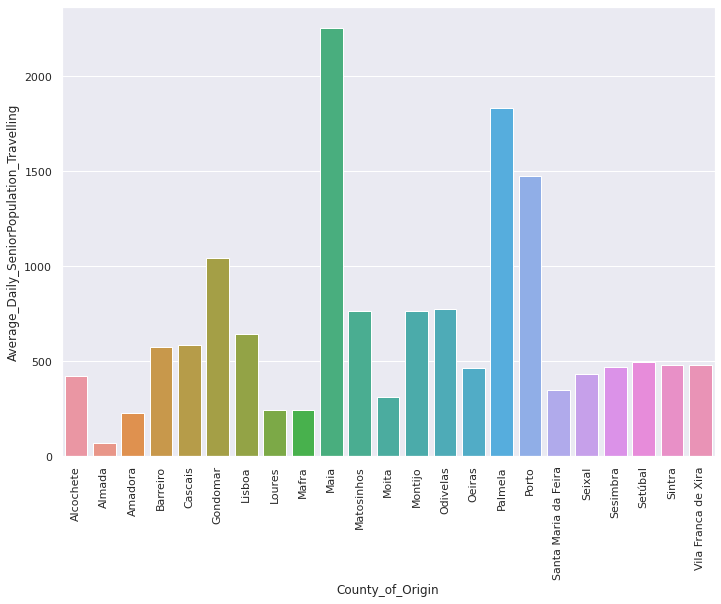

In [81]:
data_senior_counties = data_senior[['County_of_Origin', "Average_Daily_SeniorPopulation_Travelling"]].groupby("County_of_Origin").mean()
data_senior_counties.reset_index(inplace=True) #reset index in order to draw barplot
sns.barplot(x = 'County_of_Origin' , y = 'Average_Daily_SeniorPopulation_Travelling' ,data= data_senior_counties)
plt.xticks(rotation='vertical')
plt.show

The graph highlights the average of average daily senior population travelling on different road segments from the same county
We assume that can highlight / generalize from which counties the seniors that travel the most are from - why ?
The data_senior includes various means of transportation including foot, cars, buses etc...

The data/graph above highlights that seniors from the regions of Maia, Palmela, Porto and Gondomar tend to travel a lot from 
these counties. Around 1000 seniors travel daily. 

In [11]:
list_of_counties = data_senior['County_of_Origin'].unique().tolist() 
list_of_counties
#23 counties focused in the districts of Lisboa, Porto and Setúbal

['Lisboa',
 'Palmela',
 'Oeiras',
 'Vila Franca de Xira',
 'Sintra',
 'Barreiro',
 'Seixal',
 'Almada',
 'Amadora',
 'Mafra',
 'Odivelas',
 'Sesimbra',
 'Maia',
 'Loures',
 'Porto',
 'Gondomar',
 'Setúbal',
 'Cascais',
 'Montijo',
 'Santa Maria da Feira',
 'Matosinhos',
 'Moita',
 'Alcochete']

In [84]:
data_senior_linkid = data_senior.groupby('linkid').sum()
data_senior_linkid.sort_values(by = 'Average_Daily_SeniorPopulation_Travelling', ascending= False)
#checking for the most used road segments 

,Average_Daily_SeniorPopulation_Travelling
linkid,
1172433797,37310.11318
859195431,37058.68901
543101397,34915.13600
543100816,34212.68948
1172433799,32203.10665
...,...
587115086,20.46470
1121211630,20.46470
80264449,20.46470


#### data_users

In [13]:
#bus usage per counties, gender, age and timeframe
data_users.head(15)

,Region_of_Origin,District_of_Origin,County_of_Origin,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day
0,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,15-24,294.19421
1,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,25-34,1081.65282
2,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,35-44,235.83665
3,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,45-54,840.95132
4,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,55-64,1216.14809
5,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Male,15-24,1148.42705
6,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Male,25-34,421.94018
7,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Male,35-44,137.69761
8,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Male,45-54,617.69316
9,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Male,55-64,867.48191


In [14]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Region_of_Origin          544 non-null    object 
 1   District_of_Origin        544 non-null    object 
 2   County_of_Origin          544 non-null    object 
 3   Period                    544 non-null    object 
 4   GenderDescription         544 non-null    object 
 5   AgeClassDescription       544 non-null    object 
 6   Average_BusUsers_per_Day  544 non-null    float64
dtypes: float64(1), object(6)
memory usage: 29.9+ KB


In [15]:
data_users.describe()

,Average_BusUsers_per_Day
count,544.00000
mean,1165.39664
std,3842.86774
min,5.51498
25%,158.80113
50%,475.67733
75%,990.06429
max,66882.20846


In [16]:
# the dataset is divided between two periods Sep-19 to Feb-20 (pre-covid) & Sep-20 to Jan-21 (during covid)
data_users_pre = data_users[data_users['Period']== 'Sep-19 to Feb-20']
data_users_covid = data_users[data_users['Period']== 'Sep-20 to Jan-21']

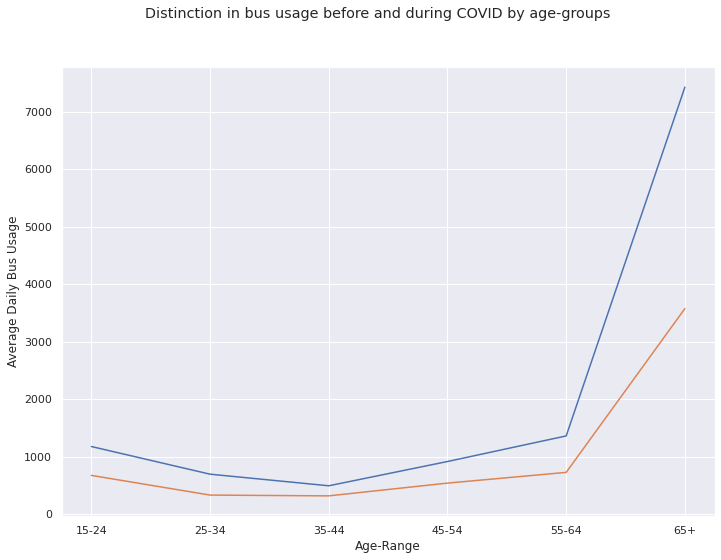

In [17]:
fig = plt.figure()
fig.suptitle('Distinction in bus usage before and during COVID by age-groups')
plt.plot(data_users_pre.groupby("AgeClassDescription").mean()) #there is an average of 7'000 daily bus usage for seniors pre-covid
plt.plot(data_users_covid.groupby("AgeClassDescription").mean()) #there is an average of 3'500 daily bus usage for seniors during covid
plt.xlabel('Age-Range')
plt.ylabel('Average Daily Bus Usage')
plt.show()

# From the graph below we can see a huge drop in usage before and during COVID. The drop seems huge especially for those +65 years old.

Visually the drop is significant for those +65, however it has been important also the other age groups. However, as a percentage, other
segments could have been affected significantly too.


In [85]:
average_decrease_bus_usage = (data_users_covid.groupby("AgeClassDescription").mean() - data_users_pre.groupby("AgeClassDescription").mean())\
                            /data_users_pre.groupby("AgeClassDescription").mean() * 100
average_decrease_bus_usage.reset_index(inplace=True)
average_decrease_bus_usage.rename(columns={'Average_BusUsers_per_Day':'%_drop_in_bus_usage'},inplace=True)
average_decrease_bus_usage

,AgeClassDescription,%_drop_in_bus_usage
0,15-24,-42.62315
1,25-34,-52.18168
2,35-44,-35.42488
3,45-54,-40.93281
4,55-64,-46.55205
5,65+,-51.84582


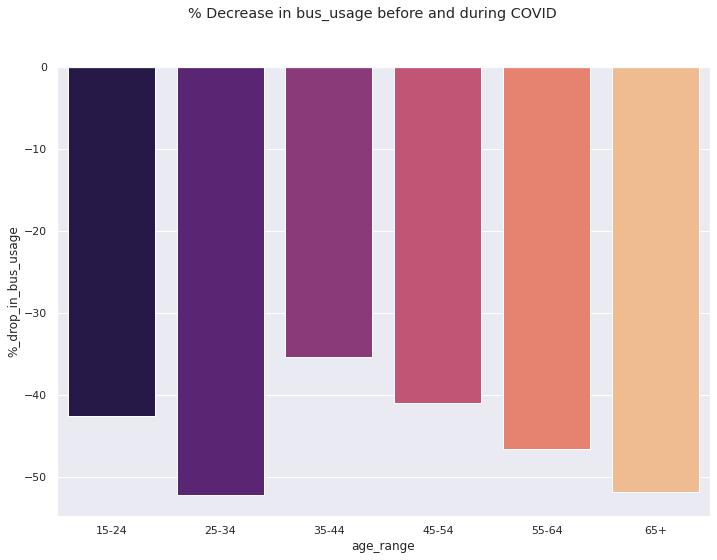

In [19]:
fig = plt.figure()
fig.suptitle('% Decrease in bus_usage before and during COVID')
sns.set_palette('magma')
sns.barplot(x='AgeClassDescription', y='%_drop_in_bus_usage', data = average_decrease_bus_usage)
plt.xlabel('age_range')
plt.ylabel('%_drop_in_bus_usage')
plt.show()

Interestingly, the age groups that have been most affected by COVID were the young adults between 25-34 as well as seniors
with drops in bus usage above 50%

#### data_users_senior

In [86]:
#function to get data from data_users only for those aged above 65 years old
def get_senior_data(df):
    df_senior_raw = df[df['AgeClassDescription']=='65+']
    df_senior = df_senior_raw[['County_of_Origin','Period','GenderDescription','Average_BusUsers_per_Day']]
    return df_senior

In [87]:
data_users_senior_covid = get_senior_data(data_users_covid)
data_users_senior_pre = get_senior_data(data_users_pre)

In [22]:
def print_figure_senior(df):
    plt.xticks(rotation='vertical')
    plt.ylim(0,70000)
    sns.barplot(x='County_of_Origin', y='Average_BusUsers_per_Day', hue='GenderDescription', data = df, palette='magma')
    plt.legend(loc=2)

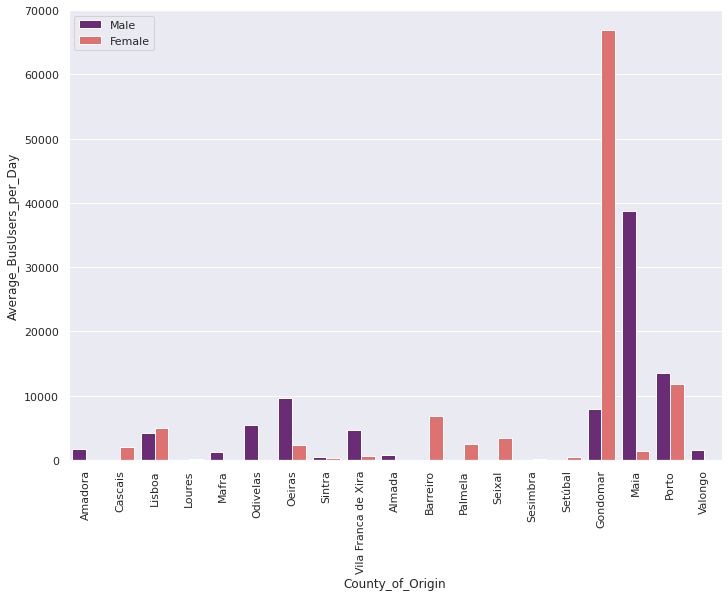

In [23]:
print_figure_senior(data_users_senior_pre)

The graph above reflects the difference in bus usage between men and women before COVID and for each regions. We can see that somre regions such as Gondomar has a relatively high number of women taking the bus, while Maia has a disproportionately large number of men taking the bus. 

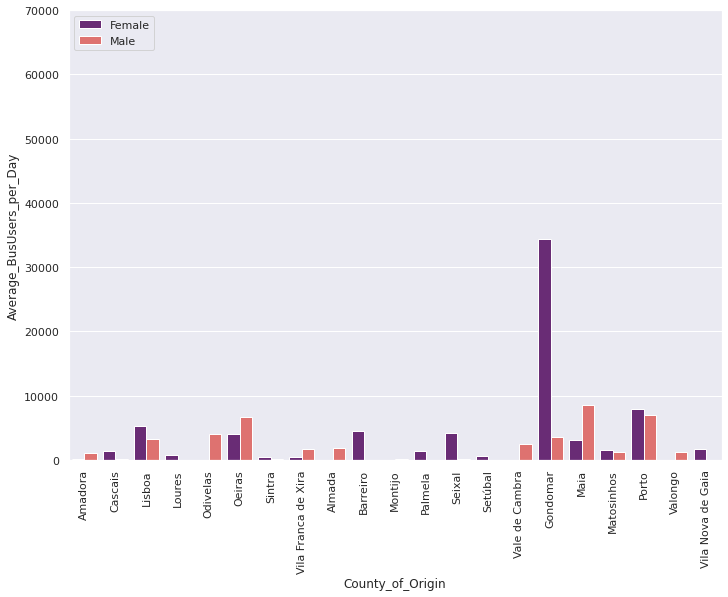

In [88]:
# hue colors are reversed
print_figure_senior(data_users_senior_covid)

#### Bus Usage Distinction before and during COVID

In [25]:
data_users_senior_pre

,County_of_Origin,Period,GenderDescription,Average_BusUsers_per_Day
10,Amadora,Sep-19 to Feb-20,Male,1612.85136
16,Cascais,Sep-19 to Feb-20,Female,2017.33398
27,Lisboa,Sep-19 to Feb-20,Female,4955.50375
33,Lisboa,Sep-19 to Feb-20,Male,4116.75536
39,Loures,Sep-19 to Feb-20,Female,147.47484
54,Mafra,Sep-19 to Feb-20,Male,1217.08844
64,Odivelas,Sep-19 to Feb-20,Male,5441.10949
70,Oeiras,Sep-19 to Feb-20,Female,2264.58525
75,Oeiras,Sep-19 to Feb-20,Male,9574.86854
81,Sintra,Sep-19 to Feb-20,Female,341.16600


In [26]:
def get_clean_df(df1, df2):
    df1 = df1.groupby('County_of_Origin').sum()
    df2 = df2.groupby('County_of_Origin').sum()
    df = df1.merge(df2, on = 'County_of_Origin', how = 'left')
    df.rename(columns={"Average_BusUsers_per_Day_x": "average_bus_per_day_pre", "Average_BusUsers_per_Day_y": "average_bus_per_day_cov"}, inplace=True)
    df.reset_index(inplace=True)
    return df

In [27]:
data_users_senior_pre_during = get_clean_df(data_users_senior_pre,data_users_senior_covid)
data_users_senior_pre_during

,County_of_Origin,average_bus_per_day_pre,average_bus_per_day_cov
0,Almada,754.47864,1903.34334
1,Amadora,1612.85136,1165.03726
2,Barreiro,6863.50890,4419.36451
3,Cascais,2017.33398,1363.80012
4,Gondomar,74829.25913,37911.22728
5,Lisboa,9072.25910,8416.24178
6,Loures,147.47484,702.81448
7,Mafra,1217.08844,NaN
8,Maia,40152.82828,11683.68565
9,Odivelas,5441.10949,4068.79843


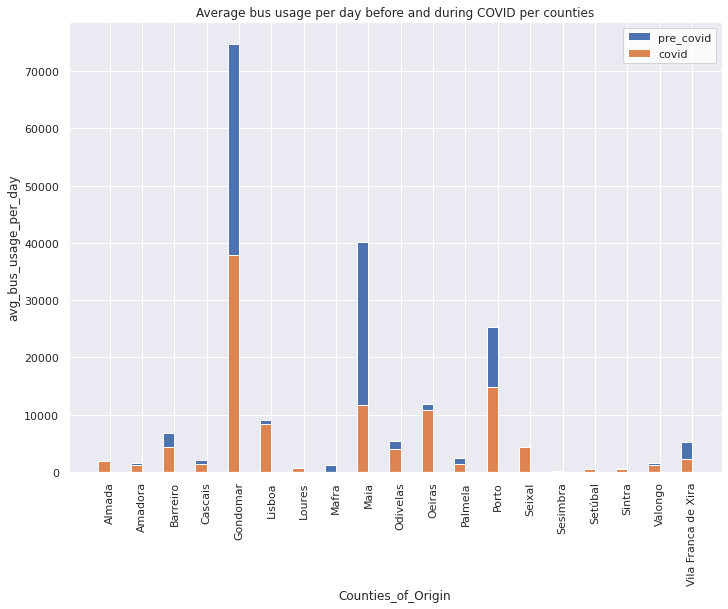

In [89]:
#Checking the drop in Average_BusUsers_per_Day before & After Covid - we can see that some regions such as Gondomar and Matosinhos
#have experienced huge declines

labels = data_users_senior_pre_during['County_of_Origin'].tolist()
x = np.arange(len(labels))
width = 0.35 
fig, ax = plt.subplots()

barPre = ax.bar(x - width/2, data_users_senior_pre_during['average_bus_per_day_pre'], width, label= 'pre_covid')
barCov = ax.bar(x - width/2, data_users_senior_pre_during['average_bus_per_day_cov'], width, label= 'covid')

sns.set_style("whitegrid")
sns.set_palette("dark:#2C2")


ax.set_ylabel('avg_bus_usage_per_day')
ax.set_xlabel('Counties_of_Origin')

ax.set_title('Average bus usage per day before and during COVID per counties')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation='vertical')

plt.show()

Graph above highlights the distinction of bus utility per counties before and durign COVID. Some regions with much greater drops.

#### data_od

In [29]:
data_od

,Region_of_Origin,District_of_Origin,County_of_Origin,Region_of_Public_Transportation,District_of_Public_Transportation,County_of_Public_Transportation,Dicofre_ParishCode_of_Public_Transportation,Demand_weight
0,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.30732
1,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110639,0.07000
2,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110658,0.06606
3,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110654,0.05985
4,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110633,0.05234
...,...,...,...,...,...,...,...,...
2248,R2 - AM Porto,Porto,Vila Nova de Gaia,R1 - AM Lisboa,SETÚBAL,ALMADA,150315,0.00000
2249,R2 - AM Porto,Porto,Vila Nova de Gaia,R2 - AM Porto,PORTO,GONDOMAR,130414,0.00000
2250,R2 - AM Porto,Porto,Vila Nova de Gaia,R1 - AM Lisboa,LISBOA,ODIVELAS,111608,0.00000
2251,R2 - AM Porto,Porto,Vila Nova de Gaia,R1 - AM Lisboa,SETÚBAL,ALMADA,150313,0.00000


In [30]:
#unique identifier for each parish 
#It is designated DICOFRE in portuguese, related with de first terms of the words DIstrito, COncelho, FREguesia
#refers to destination
data_od['Dicofre_ParishCode_of_Public_Transportation'].nunique() #100 parishes

100

In [31]:
data_od[['County_of_Origin','Demand_weight']].groupby('County_of_Origin').sum().head()
# The demand weight is normalized per county. 
#This means that the sum of all the demand weights with the same county of origin will be around 1

,Demand_weight
County_of_Origin,
Alcochete,1.00000
Almada,1.00001
Amadora,1.00001
Barreiro,1.00000
Cascais,1.00000


Although, we could have made use of the data, we decided to put it aside because it would have been hard to distinguish between population segments. 

### Demographic Data - PORDATA

This part involves importing the various demographic information from PORDATA datasets. The files came in XLSX format. We exported them as CSVs, and cleaned the data so that it could be directly accessed with pd.read_csv().

In [32]:
def get_data_from_csv(file_name):
    df = pd.read_csv(f'county_data/PORDATA_{file_name}.csv')
    return df

In [90]:
#list of counties included in the WDL datasets
list_of_counties

['Lisboa',
 'Palmela',
 'Oeiras',
 'Vila Franca de Xira',
 'Sintra',
 'Barreiro',
 'Seixal',
 'Almada',
 'Amadora',
 'Mafra',
 'Odivelas',
 'Sesimbra',
 'Maia',
 'Loures',
 'Porto',
 'Gondomar',
 'Setúbal',
 'Cascais',
 'Montijo',
 'Santa Maria da Feira',
 'Matosinhos',
 'Moita',
 'Alcochete']

In [91]:
# Total Population & Senior Population in the regions of Portugal
df_senior_pop = get_data_from_csv('population_per_large_age_groups')
df_senior_pop

,Regions,pop_total_2011,pop_seniors_2011
0,Portugal,10562178.00000,2010064.00000
1,Continente,10047621.00000,1937788.00000
2,Norte,3689682.00000,631439.00000
3,Alto Minho,244836.00000,56628.00000
4,Arcos de Valdevez,22847.00000,7057.00000
...,...,...,...
348,Santa Cruz,43005.00000,4330.00000
349,Santana,7719.00000,1826.00000
350,São Vicente,5723.00000,1298.00000
351,Ilha de Porto Santo,5483.00000,731.00000


In [35]:
# number of seniors per 100 young people
df_aging_index = get_data_from_csv('aging_index')
df_aging_index

,Regions,aging_index_2001,aging_index_2011,aging_index_2019
0,Portugal,101.60000,125.80000,161.30000
1,Continente,103.80000,128.60000,164.10000
2,Norte,79.40000,111.80000,162.70000
3,Alto Minho,131.70000,170.40000,223.00000
4,Arcos de Valdevez,208.10000,270.20000,337.60000
...,...,...,...,...
348,Santa Cruz,56.10000,51.60000,73.50000
349,Santana,128.10000,176.80000,249.60000
350,São Vicente,121.50000,165.80000,258.10000
351,Ilha de Porto Santo,57.40000,75.40000,103.30000


In [36]:
# dependency_index - where there are more and less elderly people per 100 people of working age
df_dependency_index = get_data_from_csv('early_dependence_index')
df_dependency_index

,Regions,early_dependence_index_1960,early_depedence_index_1981,early_dependence_index_2001,early_dependence_index_2011
0,Portugal,12.7,18.2,24.2,28.80000
1,Continente,12.8,18.1,24.4,29.20000
2,Norte,11.8,16.0,20.4,25.20000
3,Alto Minho,16.4,23.7,30.7,36.40000
4,Arcos de Valdevez,17.2,28.4,44.4,53.40000
...,...,...,...,...,...
348,Santa Cruz,11.3,20.5,16.4,14.10000
349,Santana,10.9,18.6,31.7,37.40000
350,São Vicente,11.0,21.3,32.5,35.80000
351,Ilha de Porto Santo,12.1,12.5,14.5,18.60000


In [37]:
# Single Person Families -  families with only one member / solo living 
# Might impact the ability of moving around on their own
df_SPF = get_data_from_csv('single_person_families')
df_SPF

,Regions,spf_2001,spf_2011,spf_senior_2001,spf_senior_2011
0,Portugal,631762.0,866827.00000,321054.0,406942.00000
1,Continente,611627.0,834680.00000,310860.0,393590.00000
2,Norte,159894.0,228923.00000,84003.0,109884.00000
3,Alto Minho,13098.0,17241.00000,8088.0,9983.00000
4,Arcos de Valdevez,1959.0,2285.00000,1346.0,1513.00000
...,...,...,...,...,...
348,Santa Cruz,1067.0,2537.00000,504.0,755.00000
349,Santana,578.0,746.00000,375.0,486.00000
350,São Vicente,460.0,555.00000,268.0,318.00000
351,Ilha de Porto Santo,185.0,472.00000,67.0,130.00000


In [38]:
# population per square km
df_pop_density = get_data_from_csv('population_density')
df_pop_density

,Regions,pop_density_2001,pop_density_2011,pop_density_2019
0,Portugal,112.50000,114.50000,111.50000
1,Continente,110.90000,112.70000,109.90000
2,Norte,173.20000,173.40000,167.90000
3,Alto Minho,112.70000,110.30000,104.00000
4,Arcos de Valdevez,55.20000,51.00000,46.80000
...,...,...,...,...
348,Santa Cruz,448.90000,528.20000,552.30000
349,Santana,91.20000,79.90000,70.50000
350,São Vicente,76.50000,71.80000,65.30000
351,Ilha de Porto Santo,112.70000,127.60000,120.60000


In [92]:
# Habitants per pharmacy and per doctors - healthcare is an important feature to take into account because it is one of the primary reasons for seniors going outside
df_healthcare = get_data_from_csv('habitants_per_pharmacy_doctors')
df_healthcare

,Regions,pop_per_doc_2001,pop_per_doc_2019,pop_per_pharm_2001,pop_per_pharm_2019
0,Portugal,311.8,185.60000,1365.3,742.5
1,Continente,305.2,183.20000,1328.7,730.0
2,Norte,351.2,186.20000,1816.8,871.1
3,Alto Minho,523.2,254.10000,2381.7,857.6
4,Arcos de Valdevez,1234.3,476.10000,4114.3,837.9
...,...,...,...,...,...
348,Santa Cruz,561.1,326.20000,3787.6,1667.1
349,Santana,4374.8,1346.10000,2916.5,1346.1
350,São Vicente,2059.5,857.80000,2059.5,1286.6
351,Ilha de Porto Santo,4517.5,518.90000,1129.4,2594.5


In [93]:
# Road accidents with victims - important feature because it can highlight security or traffic problems
df_road_accidents = get_data_from_csv('road_accidents')
df_road_accidents

,Regions,road_acc_1987,road_acc_2019
0,Portugal,x,x
1,Continente,38656.0,35704.0
2,Norte,12153.0,12850.0
3,Alto Minho,862.0,859.0
4,Arcos de Valdevez,49.0,73.0
...,...,...,...
348,Santa Cruz,x,x
349,Santana,x,x
350,São Vicente,x,x
351,Ilha de Porto Santo,x,x


In [94]:
# Environmental Expenditure - % of environmental expenses out of total expenses 
# Cool feature to take into account because it may highlight the importance the various counties attribute to the environment
# and therefore indirectly to public transportation
df_env_exp = get_data_from_csv('environment_expenditure')
df_env_exp

,Regions,env_exp_2001,env_exp_2018
0,Portugal,7.9,8.30000
1,Continente,7.8,8.20000
2,Norte,5.9,7.10000
3,Alto Minho,4.9,5.30000
4,Arcos de Valdevez,6.3,5.30000
...,...,...,...
348,Santa Cruz,39.6,18.40000
349,Santana,3.3,2.60000
350,São Vicente,5.0,10.80000
351,Ilha de Porto Santo,8.0,5.60000


In [95]:
# Purchasing Power Per Capita - regions with low income may have greater demand for public transportation as a cheaper alternative
# to owning  a car
df_purchasing_power = get_data_from_csv('purchasing_power')
df_purchasing_power

,Regions,purchasing_power_1993,purchasing_power_2017
0,Portugal,100.0,100.0
1,Continente,101.8,100.7
2,Norte,81.7,92.1
3,Alto Minho,55.3,79.7
4,Arcos de Valdevez,36.5,67.8
...,...,...,...
348,Santa Cruz,43.3,71.5
349,Santana,30.1,58.3
350,São Vicente,25.6,61.0
351,Ilha de Porto Santo,50.6,93.5


#### Joining Demographic & WDL Datasets

In [43]:
data_users_senior_pre_during.head()

,County_of_Origin,average_bus_per_day_pre,average_bus_per_day_cov
0,Almada,754.47864,1903.34334
1,Amadora,1612.85136,1165.03726
2,Barreiro,6863.50890,4419.36451
3,Cascais,2017.33398,1363.80012
4,Gondomar,74829.25913,37911.22728


In [44]:
def column_rename(df, dict_rename):
    df.rename(columns = dict_rename, inplace = True)
    return df

In [45]:
def column_remover(df, list_of_col):
    df.drop(columns = list_of_col, inplace = True)
    return df

In [46]:
list_df_demographics = [df_aging_index,df_dependency_index,df_env_exp,df_healthcare,df_pop_density, df_SPF,df_purchasing_power,df_road_accidents, df_senior_pop]

In [47]:
# rename columns from Regions to County_of_Origin
for df in list_df_demographics:
    column_rename(df, {'Regions': 'County_of_Origin'})

In [48]:
import functools
df_full_dem = functools.reduce(lambda left,right: pd.merge(left,right,on='County_of_Origin',how='left'),list_df_demographics)
df_full_dem

,County_of_Origin,aging_index_2001,aging_index_2011,aging_index_2019,early_dependence_index_1960,early_depedence_index_1981,early_dependence_index_2001,early_dependence_index_2011,env_exp_2001,env_exp_2018,...,spf_2001,spf_2011,spf_senior_2001,spf_senior_2011,purchasing_power_1993,purchasing_power_2017,road_acc_1987,road_acc_2019,pop_total_2011,pop_seniors_2011
0,Portugal,101.60000,125.80000,161.30000,12.7,18.2,24.2,28.80000,7.9,8.30000,...,631762.0,866827.00000,321054.0,406942.00000,100.0,100.0,x,x,10562178.00000,2010064.00000
1,Continente,103.80000,128.60000,164.10000,12.8,18.1,24.4,29.20000,7.8,8.20000,...,611627.0,834680.00000,310860.0,393590.00000,101.8,100.7,38656.0,35704.0,10047621.00000,1937788.00000
2,Norte,79.40000,111.80000,162.70000,11.8,16.0,20.4,25.20000,5.9,7.10000,...,159894.0,228923.00000,84003.0,109884.00000,81.7,92.1,12153.0,12850.0,3689682.00000,631439.00000
3,Alto Minho,131.70000,170.40000,223.00000,16.4,23.7,30.7,36.40000,4.9,5.30000,...,13098.0,17241.00000,8088.0,9983.00000,55.3,79.7,862.0,859.0,244836.00000,56628.00000
4,Arcos de Valdevez,208.10000,270.20000,337.60000,17.2,28.4,44.4,53.40000,6.3,5.30000,...,1959.0,2285.00000,1346.0,1513.00000,36.5,67.8,49.0,73.0,22847.00000,7057.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,Santa Cruz,56.10000,51.60000,73.50000,11.3,20.5,16.4,14.10000,39.6,18.40000,...,1067.0,2537.00000,504.0,755.00000,43.3,71.5,x,x,43005.00000,4330.00000
2389,Santana,128.10000,176.80000,249.60000,10.9,18.6,31.7,37.40000,3.3,2.60000,...,578.0,746.00000,375.0,486.00000,30.1,58.3,x,x,7719.00000,1826.00000
2390,São Vicente,121.50000,165.80000,258.10000,11.0,21.3,32.5,35.80000,5.0,10.80000,...,460.0,555.00000,268.0,318.00000,25.6,61.0,x,x,5723.00000,1298.00000
2391,Ilha de Porto Santo,57.40000,75.40000,103.30000,12.1,12.5,14.5,18.60000,8.0,5.60000,...,185.0,472.00000,67.0,130.00000,50.6,93.5,x,x,5483.00000,731.00000


In [49]:
# Merged average bus usage per day for seniors with demographic data

In [50]:
df_full_dem_bus = data_users_senior_pre_during.merge(df_full_dem, on = 'County_of_Origin', how = 'left')
df_full_dem_bus

,County_of_Origin,average_bus_per_day_pre,average_bus_per_day_cov,aging_index_2001,aging_index_2011,aging_index_2019,early_dependence_index_1960,early_depedence_index_1981,early_dependence_index_2001,early_dependence_index_2011,...,spf_2001,spf_2011,spf_senior_2001,spf_senior_2011,purchasing_power_1993,purchasing_power_2017,road_acc_1987,road_acc_2019,pop_total_2011,pop_seniors_2011
0,Almada,754.47864,1903.34334,118.00000,130.60000,155.10000,7.2,11.8,24.2,31.70000,...,11955.0,18544.00000,5112.0,7846.00000,119.9,108.7,565.0,496.0,174030.00000,35725.00000
1,Amadora,1612.85136,1165.03726,93.00000,132.70000,149.70000,-,9.0,19.7,28.10000,...,14556.0,20119.00000,5095.0,7948.00000,132.6,100.6,374.0,602.0,175136.00000,32742.00000
2,Barreiro,6863.50890,4419.36451,121.50000,151.60000,189.80000,9.7,11.8,22.2,33.70000,...,5297.0,8113.00000,2618.0,3804.00000,90.9,100.0,320.0,190.0,78764.00000,17011.00000
3,Cascais,2017.33398,1363.80012,98.60000,103.40000,129.50000,9.1,12.7,21.6,26.80000,...,12269.0,20210.00000,4859.0,8021.00000,144.8,122.1,776.0,637.0,206479.00000,36714.00000
4,Gondomar,74829.25913,37911.22728,62.70000,96.90000,154.20000,9.0,11.2,15.3,21.50000,...,5797.0,9466.00000,2725.0,4132.00000,84.4,84.1,225.0,462.0,168027.00000,25170.00000
5,Lisboa,9072.25910,8416.24178,198.70000,200.80000,171.50000,12.8,21.4,36.4,37.80000,...,71622.0,85244.00000,33770.0,36521.00000,291.0,219.6,3967.0,2768.0,547733.00000,130960.00000
6,Loures,147.47484,702.81448,77.00000,112.20000,137.90000,7.2,8.9,┴ 17.0,25.60000,...,"┴ 11,349",17492.00000,"┴ 4,362",6990.00000,112.2,92.3,674.0,733.0,205054.00000,35277.00000
7,Mafra,1217.08844,NaN,95.00000,76.20000,96.40000,12.4,18.2,22.8,22.30000,...,3661.0,5616.00000,1810.0,2261.00000,83.6,96.3,204.0,281.0,76685.00000,11344.00000
8,Maia,40152.82828,11683.68565,59.50000,79.40000,122.40000,9.1,12.0,14.6,19.20000,...,4595.0,8439.00000,1793.0,2939.00000,109.0,110.7,254.0,399.0,135306.00000,18108.00000
9,Odivelas,5441.10949,4068.79843,80.30000,111.70000,126.50000,-,-,16.4,23.70000,...,8582.0,12970.00000,2919.0,4663.00000,//,89.3,//,423.0,144549.00000,23501.00000


#### Demographic Data for the Region of Lisboa

We decided to work primarily on the district of Lisbon because we found interesting public transportation data for that region. 

In [51]:
counties_of_lisboa = ['Amadora','Cascais','Lisboa','Loures','Mafra','Odivelas','Oeiras','Sintra','Vila Franca de Xira']

In [52]:
pd.set_option('display.max_columns', None)

In [53]:
df_demographics_lisboa = df_full_dem_bus[df_full_dem_bus['County_of_Origin'].isin(counties_of_lisboa)]
df_demographics_lisboa

,County_of_Origin,average_bus_per_day_pre,average_bus_per_day_cov,aging_index_2001,aging_index_2011,aging_index_2019,early_dependence_index_1960,early_depedence_index_1981,early_dependence_index_2001,early_dependence_index_2011,env_exp_2001,env_exp_2018,pop_per_doc_2001,pop_per_doc_2019,pop_per_pharm_2001,pop_per_pharm_2019,pop_density_2001,pop_density_2011,pop_density_2019,spf_2001,spf_2011,spf_senior_2001,spf_senior_2011,purchasing_power_1993,purchasing_power_2017,road_acc_1987,road_acc_2019,pop_total_2011,pop_seniors_2011
1,Amadora,1612.85136,1165.03726,93.00000,132.70000,149.70000,-,9.0,19.7,28.10000,7.1,12.60000,316.8,319.80000,914.2,650.9,7375.50000,7376.10000,7692.00000,14556.0,20119.00000,5095.0,7948.00000,132.6,100.6,374.0,602.0,175136.00000,32742.00000
3,Cascais,2017.33398,1363.80012,98.60000,103.40000,129.50000,9.1,12.7,21.6,26.80000,1.5,20.50000,156.2,130.90000,1354.3,737.2,1769.10000,2127.10000,2187.30000,12269.0,20210.00000,4859.0,8021.00000,144.8,122.1,776.0,637.0,206479.00000,36714.00000
5,Lisboa,9072.25910,8416.24178,198.70000,200.80000,171.50000,12.8,21.4,36.4,37.80000,8.7,7.80000,81.3,52.40000,356.5,254.7,6656.80000,6389.60000,5081.10000,71622.0,85244.00000,33770.0,36521.00000,291.0,219.6,3967.0,2768.0,547733.00000,130960.00000
6,Loures,147.47484,702.81448,77.00000,112.20000,137.90000,7.2,8.9,┴ 17.0,25.60000,6.9,9.20000,221.3,308.00000,1530.6,767.2,1177.00000,1216.90000,1270.80000,"┴ 11,349",17492.00000,"┴ 4,362",6990.00000,112.2,92.3,674.0,733.0,205054.00000,35277.00000
7,Mafra,1217.08844,NaN,95.00000,76.20000,96.40000,12.4,18.2,22.8,22.30000,13.3,11.00000,800.8,413.80000,2402.5,1455.4,189.50000,265.60000,289.40000,3661.0,5616.00000,1810.0,2261.00000,83.6,96.3,204.0,281.0,76685.00000,11344.00000
9,Odivelas,5441.10949,4068.79843,80.30000,111.70000,126.50000,-,-,16.4,23.70000,5.6,2.10000,-,327.90000,4062.9,1217.3,5035.60000,5528.20000,6054.60000,8582.0,12970.00000,2919.0,4663.00000,//,89.3,//,423.0,144549.00000,23501.00000
10,Oeiras,11839.45379,10779.30191,105.00000,125.60000,159.50000,8.1,┴ 10.6,20.9,29.30000,4.7,9.60000,120.9,100.00000,636.7,350.8,3540.80000,3759.10000,3853.80000,13302.0,19571.00000,4790.0,7602.00000,139.7,156.5,469.0,647.0,172120.00000,32969.00000
16,Sintra,712.37361,558.59923,55.70000,77.80000,107.90000,10.8,┴ 11.0,14.3,19.90000,5.2,11.90000,520.9,379.30000,1508.6,812.3,1138.40000,1186.40000,1221.40000,22025.0,30283.00000,6909.0,10612.00000,112.7,94.1,627.0,1009.0,377835.00000,51657.00000
18,Vila Franca de Xira,5218.46004,2234.60491,66.40000,80.00000,114.50000,9.8,11.4,15.3,19.50000,5.7,4.90000,806.2,553.80000,1814.1,783.3,381.30000,432.30000,445.60000,7042.0,10594.00000,2678.0,3844.00000,104.6,98.4,396.0,356.0,136886.00000,18493.00000


In [54]:
#check for non-numeric values
df_demographics_lisboa.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

County_of_Origin               False
average_bus_per_day_pre         True
average_bus_per_day_cov        False
aging_index_2001                True
aging_index_2011                True
aging_index_2019                True
early_dependence_index_1960    False
early_depedence_index_1981     False
early_dependence_index_2001    False
early_dependence_index_2011     True
env_exp_2001                    True
env_exp_2018                    True
pop_per_doc_2001               False
pop_per_doc_2019                True
pop_per_pharm_2001              True
pop_per_pharm_2019              True
pop_density_2001                True
pop_density_2011                True
pop_density_2019                True
spf_2001                       False
spf_2011                        True
spf_senior_2001                False
spf_senior_2011                 True
purchasing_power_1993          False
purchasing_power_2017           True
road_acc_1987                  False
road_acc_2019                   True
p

In [55]:
df_demographics_lisboa

,County_of_Origin,average_bus_per_day_pre,average_bus_per_day_cov,aging_index_2001,aging_index_2011,aging_index_2019,early_dependence_index_1960,early_depedence_index_1981,early_dependence_index_2001,early_dependence_index_2011,env_exp_2001,env_exp_2018,pop_per_doc_2001,pop_per_doc_2019,pop_per_pharm_2001,pop_per_pharm_2019,pop_density_2001,pop_density_2011,pop_density_2019,spf_2001,spf_2011,spf_senior_2001,spf_senior_2011,purchasing_power_1993,purchasing_power_2017,road_acc_1987,road_acc_2019,pop_total_2011,pop_seniors_2011
1,Amadora,1612.85136,1165.03726,93.00000,132.70000,149.70000,-,9.0,19.7,28.10000,7.1,12.60000,316.8,319.80000,914.2,650.9,7375.50000,7376.10000,7692.00000,14556.0,20119.00000,5095.0,7948.00000,132.6,100.6,374.0,602.0,175136.00000,32742.00000
3,Cascais,2017.33398,1363.80012,98.60000,103.40000,129.50000,9.1,12.7,21.6,26.80000,1.5,20.50000,156.2,130.90000,1354.3,737.2,1769.10000,2127.10000,2187.30000,12269.0,20210.00000,4859.0,8021.00000,144.8,122.1,776.0,637.0,206479.00000,36714.00000
5,Lisboa,9072.25910,8416.24178,198.70000,200.80000,171.50000,12.8,21.4,36.4,37.80000,8.7,7.80000,81.3,52.40000,356.5,254.7,6656.80000,6389.60000,5081.10000,71622.0,85244.00000,33770.0,36521.00000,291.0,219.6,3967.0,2768.0,547733.00000,130960.00000
6,Loures,147.47484,702.81448,77.00000,112.20000,137.90000,7.2,8.9,┴ 17.0,25.60000,6.9,9.20000,221.3,308.00000,1530.6,767.2,1177.00000,1216.90000,1270.80000,"┴ 11,349",17492.00000,"┴ 4,362",6990.00000,112.2,92.3,674.0,733.0,205054.00000,35277.00000
7,Mafra,1217.08844,NaN,95.00000,76.20000,96.40000,12.4,18.2,22.8,22.30000,13.3,11.00000,800.8,413.80000,2402.5,1455.4,189.50000,265.60000,289.40000,3661.0,5616.00000,1810.0,2261.00000,83.6,96.3,204.0,281.0,76685.00000,11344.00000
9,Odivelas,5441.10949,4068.79843,80.30000,111.70000,126.50000,-,-,16.4,23.70000,5.6,2.10000,-,327.90000,4062.9,1217.3,5035.60000,5528.20000,6054.60000,8582.0,12970.00000,2919.0,4663.00000,//,89.3,//,423.0,144549.00000,23501.00000
10,Oeiras,11839.45379,10779.30191,105.00000,125.60000,159.50000,8.1,┴ 10.6,20.9,29.30000,4.7,9.60000,120.9,100.00000,636.7,350.8,3540.80000,3759.10000,3853.80000,13302.0,19571.00000,4790.0,7602.00000,139.7,156.5,469.0,647.0,172120.00000,32969.00000
16,Sintra,712.37361,558.59923,55.70000,77.80000,107.90000,10.8,┴ 11.0,14.3,19.90000,5.2,11.90000,520.9,379.30000,1508.6,812.3,1138.40000,1186.40000,1221.40000,22025.0,30283.00000,6909.0,10612.00000,112.7,94.1,627.0,1009.0,377835.00000,51657.00000
18,Vila Franca de Xira,5218.46004,2234.60491,66.40000,80.00000,114.50000,9.8,11.4,15.3,19.50000,5.7,4.90000,806.2,553.80000,1814.1,783.3,381.30000,432.30000,445.60000,7042.0,10594.00000,2678.0,3844.00000,104.6,98.4,396.0,356.0,136886.00000,18493.00000


In [56]:
def clean_data(df):
    df = df.replace('┴ ','', regex=True)
    return df

In [57]:
clean_data(df_demographics_lisboa)

,County_of_Origin,average_bus_per_day_pre,average_bus_per_day_cov,aging_index_2001,aging_index_2011,aging_index_2019,early_dependence_index_1960,early_depedence_index_1981,early_dependence_index_2001,early_dependence_index_2011,env_exp_2001,env_exp_2018,pop_per_doc_2001,pop_per_doc_2019,pop_per_pharm_2001,pop_per_pharm_2019,pop_density_2001,pop_density_2011,pop_density_2019,spf_2001,spf_2011,spf_senior_2001,spf_senior_2011,purchasing_power_1993,purchasing_power_2017,road_acc_1987,road_acc_2019,pop_total_2011,pop_seniors_2011
1,Amadora,1612.85136,1165.03726,93.00000,132.70000,149.70000,-,9.0,19.7,28.10000,7.1,12.60000,316.8,319.80000,914.2,650.9,7375.50000,7376.10000,7692.00000,14556.0,20119.00000,5095.0,7948.00000,132.6,100.6,374.0,602.0,175136.00000,32742.00000
3,Cascais,2017.33398,1363.80012,98.60000,103.40000,129.50000,9.1,12.7,21.6,26.80000,1.5,20.50000,156.2,130.90000,1354.3,737.2,1769.10000,2127.10000,2187.30000,12269.0,20210.00000,4859.0,8021.00000,144.8,122.1,776.0,637.0,206479.00000,36714.00000
5,Lisboa,9072.25910,8416.24178,198.70000,200.80000,171.50000,12.8,21.4,36.4,37.80000,8.7,7.80000,81.3,52.40000,356.5,254.7,6656.80000,6389.60000,5081.10000,71622.0,85244.00000,33770.0,36521.00000,291.0,219.6,3967.0,2768.0,547733.00000,130960.00000
6,Loures,147.47484,702.81448,77.00000,112.20000,137.90000,7.2,8.9,17.0,25.60000,6.9,9.20000,221.3,308.00000,1530.6,767.2,1177.00000,1216.90000,1270.80000,"11,349",17492.00000,"4,362",6990.00000,112.2,92.3,674.0,733.0,205054.00000,35277.00000
7,Mafra,1217.08844,NaN,95.00000,76.20000,96.40000,12.4,18.2,22.8,22.30000,13.3,11.00000,800.8,413.80000,2402.5,1455.4,189.50000,265.60000,289.40000,3661.0,5616.00000,1810.0,2261.00000,83.6,96.3,204.0,281.0,76685.00000,11344.00000
9,Odivelas,5441.10949,4068.79843,80.30000,111.70000,126.50000,-,-,16.4,23.70000,5.6,2.10000,-,327.90000,4062.9,1217.3,5035.60000,5528.20000,6054.60000,8582.0,12970.00000,2919.0,4663.00000,//,89.3,//,423.0,144549.00000,23501.00000
10,Oeiras,11839.45379,10779.30191,105.00000,125.60000,159.50000,8.1,10.6,20.9,29.30000,4.7,9.60000,120.9,100.00000,636.7,350.8,3540.80000,3759.10000,3853.80000,13302.0,19571.00000,4790.0,7602.00000,139.7,156.5,469.0,647.0,172120.00000,32969.00000
16,Sintra,712.37361,558.59923,55.70000,77.80000,107.90000,10.8,11.0,14.3,19.90000,5.2,11.90000,520.9,379.30000,1508.6,812.3,1138.40000,1186.40000,1221.40000,22025.0,30283.00000,6909.0,10612.00000,112.7,94.1,627.0,1009.0,377835.00000,51657.00000
18,Vila Franca de Xira,5218.46004,2234.60491,66.40000,80.00000,114.50000,9.8,11.4,15.3,19.50000,5.7,4.90000,806.2,553.80000,1814.1,783.3,381.30000,432.30000,445.60000,7042.0,10594.00000,2678.0,3844.00000,104.6,98.4,396.0,356.0,136886.00000,18493.00000


In [75]:
df_demographics_lisboa_clean = df_demographics_lisboa.iloc[:,1:].apply(pd.to_numeric, errors='coerce')
df_demographics_lisboa_clean.insert(0, 'County_of_Origin', df_demographics_lisboa['County_of_Origin'])

In [76]:
df_demographics_lisboa_clean

,County_of_Origin,average_bus_per_day_pre,average_bus_per_day_cov,aging_index_2001,aging_index_2011,aging_index_2019,early_dependence_index_1960,early_depedence_index_1981,early_dependence_index_2001,early_dependence_index_2011,env_exp_2001,env_exp_2018,pop_per_doc_2001,pop_per_doc_2019,pop_per_pharm_2001,pop_per_pharm_2019,pop_density_2001,pop_density_2011,pop_density_2019,spf_2001,spf_2011,spf_senior_2001,spf_senior_2011,purchasing_power_1993,purchasing_power_2017,road_acc_1987,road_acc_2019,pop_total_2011,pop_seniors_2011
1,Amadora,1612.85136,1165.03726,93.00000,132.70000,149.70000,NaN,9.00000,19.70000,28.10000,7.10000,12.60000,316.80000,319.80000,914.20000,650.90000,7375.50000,7376.10000,7692.00000,14556.00000,20119.00000,5095.00000,7948.00000,132.60000,100.60000,374.00000,602.00000,175136.00000,32742.00000
3,Cascais,2017.33398,1363.80012,98.60000,103.40000,129.50000,9.10000,12.70000,21.60000,26.80000,1.50000,20.50000,156.20000,130.90000,1354.30000,737.20000,1769.10000,2127.10000,2187.30000,12269.00000,20210.00000,4859.00000,8021.00000,144.80000,122.10000,776.00000,637.00000,206479.00000,36714.00000
5,Lisboa,9072.25910,8416.24178,198.70000,200.80000,171.50000,12.80000,21.40000,36.40000,37.80000,8.70000,7.80000,81.30000,52.40000,356.50000,254.70000,6656.80000,6389.60000,5081.10000,71622.00000,85244.00000,33770.00000,36521.00000,291.00000,219.60000,3967.00000,2768.00000,547733.00000,130960.00000
6,Loures,147.47484,702.81448,77.00000,112.20000,137.90000,7.20000,8.90000,NaN,25.60000,6.90000,9.20000,221.30000,308.00000,1530.60000,767.20000,1177.00000,1216.90000,1270.80000,NaN,17492.00000,NaN,6990.00000,112.20000,92.30000,674.00000,733.00000,205054.00000,35277.00000
7,Mafra,1217.08844,NaN,95.00000,76.20000,96.40000,12.40000,18.20000,22.80000,22.30000,13.30000,11.00000,800.80000,413.80000,2402.50000,1455.40000,189.50000,265.60000,289.40000,3661.00000,5616.00000,1810.00000,2261.00000,83.60000,96.30000,204.00000,281.00000,76685.00000,11344.00000
9,Odivelas,5441.10949,4068.79843,80.30000,111.70000,126.50000,NaN,NaN,16.40000,23.70000,5.60000,2.10000,NaN,327.90000,4062.90000,1217.30000,5035.60000,5528.20000,6054.60000,8582.00000,12970.00000,2919.00000,4663.00000,NaN,89.30000,NaN,423.00000,144549.00000,23501.00000
10,Oeiras,11839.45379,10779.30191,105.00000,125.60000,159.50000,8.10000,NaN,20.90000,29.30000,4.70000,9.60000,120.90000,100.00000,636.70000,350.80000,3540.80000,3759.10000,3853.80000,13302.00000,19571.00000,4790.00000,7602.00000,139.70000,156.50000,469.00000,647.00000,172120.00000,32969.00000
16,Sintra,712.37361,558.59923,55.70000,77.80000,107.90000,10.80000,NaN,14.30000,19.90000,5.20000,11.90000,520.90000,379.30000,1508.60000,812.30000,1138.40000,1186.40000,1221.40000,22025.00000,30283.00000,6909.00000,10612.00000,112.70000,94.10000,627.00000,1009.00000,377835.00000,51657.00000
18,Vila Franca de Xira,5218.46004,2234.60491,66.40000,80.00000,114.50000,9.80000,11.40000,15.30000,19.50000,5.70000,4.90000,806.20000,553.80000,1814.10000,783.30000,381.30000,432.30000,445.60000,7042.00000,10594.00000,2678.00000,3844.00000,104.60000,98.40000,396.00000,356.00000,136886.00000,18493.00000


## Conclusions

### Scalability and Impact
Tell us how applicable and scalable your solution is if you were to implement it in a city. Identify possible limitations and measure the potential social impact of your solution.

Applicability & Scalability:

    If we had furthered our research in our solution, we could say it is quite scalable. Ultimately, it will depend on the amount of data you can cross-reference to understand the transportation patterns of different regions. Our idea was to understand the supply and demand of the current transportation system in Lisbon and render the system more effective by increasing supply (new routes, more stops etc...) where there is a clear deficit between demand and supply amongst the senior population. 

Some of the limitations: 

    - Quality of the data
    - Scalability to other regions could function but be limited due to the inherent differences in geography and demographics
    
Social Impact: 

    COVID has brought forth a significant stop on the lives of everyone, old and young. The lack of social interaction has proved a significant burden especially for the old, who come to prioritze family and friends. Through the demographic data, we found that many of the Single Person Family (individuals living alone). A large segment comprised of citizens above 65 years old. We hope that by improving the accessibility of public transportation by increasing supply where it is needed could prove truly beneficial. By increasing the independence and self-reliance of the senior population, they could answer to their basic needs of social interactions. 

### Future Work
Now picture the following scenario: imagine you could have access to any type of data that could help you solve this challenge even better. What would that data be and how would it improve your solution? 🚀

We would have loved to access additional demographic data on economic sectors and metrics such as which type of industries are located in which regions and so on. We believe that a more specific level of granularity such as parishes would have also proved to be more effective in trying to find a solution. 